In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model,layers
from PIL import Image
import os
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#To use dataset from google Drive

In [ ]:
import shutil
shutil.copyfile('/content/drive/MyDrive/Abc/apple_dataset_easy.zip','./apple_dataset_easy.zip')

'./apple_dataset_easy.zip'

In [ ]:
import zipfile

zip=zipfile.ZipFile('apple_dataset_easy.zip','r')
zip.extractall()

In [ ]:
train_image_dir='apple_dataset/train/images/'
train_annotations_dir='apple_dataset/train/annotations/'

val_image_dir='apple_dataset/validation/images/'
val_annotations_dir='apple_dataset/validation/annotations/'

#To use dataset from ROBOFLOW

chess dataset

In [ ]:
# !curl -L "https://public.roboflow.com/ds/dvrTZ36CwY?key=8lLWMJPrLs" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

face mask dataset

In [ ]:
!curl -L "https://app.roboflow.com/ds/JHoz0RiQus?key=L6y53uhRd1" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
# #augmentation

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   886  100   886    0     0   2022      0 --:--:-- --:--:-- --:--:--  2018
100 32.5M  100 32.5M    0     0  42.5M      0 --:--:-- --:--:-- --:--:-- 42.5M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.1d13317de1e4da209ba566b4acba5e0b.jpg  
 extracting: test/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.1d13317de1e4da209ba566b4acba5e0b.xml  
 extracting: test/1224331650_g_400-w_g_jpg.rf.ac3d533cf6d39adc53a89daa813ba222.jpg  
 extracting: test/1224331650_g_400-w_g_jpg.rf.ac3d533cf6d39adc53a89daa813ba222.xml  
 extracting: test/126202-untitled-design-13_jpg.rf.d9c40f748a5f8ddee298fe4b25121045.jpg  
 extracting: test/126202-untitled-design-13_jpg.rf.d9c40f748a5f8ddee298fe4b25121045.xml  
 extracting: test/1288126-10255706714j

In [ ]:
# !curl -L "https://public.roboflow.com/ds/DTD4q08DOa?key=FPI6i0iPRE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
import os 

os.makedirs('train/images/')
os.makedirs('train/annotations/')

In [ ]:
import shutil
all=os.listdir('train/')
for name in all:
  #print(name[-3:None])
  if(name[-3:None]=='jpg'):
    shutil.move(os.path.join('train/',name) , 'train/images/')
  if(name[-3:None]=='xml'):
    shutil.move(os.path.join('train/',name) , 'train/annotations/')

In [ ]:
os.makedirs('valid/images/')
os.makedirs('valid/annotations/')

In [ ]:
import os 
import shutil
all=os.listdir('valid/')
for name in all:
  #print(name[-3:None])
  if(name[-3:None]=='jpg'):
    shutil.move(os.path.join('valid/',name) , 'valid/images/')
  if(name[-3:None]=='xml'):
    shutil.move(os.path.join('valid/',name) , 'valid/annotations/')

In [ ]:
train_image_dir='train/images/'
train_annotations_dir='train/annotations/'

val_image_dir='valid/images/'
val_annotations_dir='valid/annotations/'

#Kaggle Face Mask

In [3]:
!mkdir /root/.kaggle/

In [4]:
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d andrewmvd/face-mask-detection

100% 398M/398M [00:02<00:00, 190MB/s]



In [6]:
!unzip face-mask-detection.zip >&NULL

In [7]:
train_image_dir='images/'
train_annotations_dir='annotations/'

# val_image_dir='valid/images/'
# val_annotations_dir='valid/annotations/'

#run this for getting annotation Files list

In [8]:
import os
len(os.listdir(train_image_dir))

853

In [9]:
from glob import glob
def get_bounding_box(train_annotations_dir):
  train_annotations_path=glob(train_annotations_dir+'*.xml')
  return train_annotations_path

In [ ]:
# get_bounding_box(train_annotations_dir)

#Intersection over Union and anchors test

In [10]:
import sys
import keras.backend as K
def intersection_over_union(boxes_preds, boxes_labels, box_format="midpoint"):
    """
    Video explanation of this function:
    https://youtu.be/XXYG5ZWtjj0
    This function calculates intersection over union (iou) given pred boxes
    and target boxes.
    Parameters:
        boxes_preds (tensor): Predictions of Bounding Boxes (BATCH_SIZE, 4)
        boxes_labels (tensor): Correct labels of Bounding Boxes (BATCH_SIZE, 4)
        box_format (str): midpoint/corners, if boxes (x,y,w,h) or (x1,y1,x2,y2)
    Returns:
        tensor: Intersection over union for all examples
    """

    if box_format == "midpoint":
        box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
        box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
        box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
        box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
        box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
        box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
        box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
        box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2
    #print("tada")
    #print(box1_x1,',',box1_y1,' ',box1_x2,',',box1_y2,'\n\n')  
    if box_format == "corners":
        box1_x1 = boxes_preds[..., 0:1]
        box1_y1 = boxes_preds[..., 1:2]
        box1_x2 = boxes_preds[..., 2:3]
        box1_y2 = boxes_preds[..., 3:4]
        box2_x1 = boxes_labels[..., 0:1]
        box2_y1 = boxes_labels[..., 1:2]
        box2_x2 = boxes_labels[..., 2:3]
        box2_y2 = boxes_labels[..., 3:4]
    #print("box1_x1",box1_x1,"box2_x1",box2_x1)
    #x1 = torch.max(box1_x1, box2_x1)
    x1 = K.max(K.concatenate([box1_x1,box2_x1]),axis=-1)
    #y1 = torch.max(box1_y1, box2_y1)
    y1 = K.max(K.concatenate([box1_y1,box2_y1]),axis=-1)
    #x2 = torch.min(box1_x2, box2_x2)
    x2 = K.min(K.concatenate([box1_x2,box2_x2]),axis=-1)
    #y2 = torch.min(box1_y2, box2_y2)
    y2 = K.min(K.concatenate([box1_y2,box2_y2]),axis=-1)
    #print("x1",x1)
    #print(x1,',',x2,' ',y1,',',y2)
    intersection = K.clip((x2 - x1),min_value=0,max_value=None) * K.clip((y2 - y1),min_value=0,max_value=None)
    #print('inter',intersection)
    #intersection=K.reshape(intersection,[intersection.shape[0],1])
    intersection=K.expand_dims(intersection,axis=-1)
    #print('interwith1',intersection)
    box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
    box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))
    
    # box1_area = boxes_preds[..., 2:3] * boxes_preds[..., 3:4]
    # box2_area = boxes_labels[..., 2:3] * boxes_labels[..., 3:4]

    #print(box1_area,box2_area)
    return (intersection / (box1_area + box2_area - intersection + 1e-6))

In [11]:
ANCHORS = K.variable( [[0.08285376, 0.13705531],
                       [0.20850361, 0.39420716],
                       [0.80552421, 0.77665105],
                       [0.42194719, 0.62385487]] ,dtype='float32')
padding=K.zeros_like(ANCHORS,dtype='float32')
ANCHORS = K.concatenate((padding,ANCHORS),axis=-1)
print(ANCHORS)

test_ratio=K.variable([0.3, 0.3],dtype='float32')

matrix = tf.reshape(tf.tile(test_ratio, [4]), [ 4, tf.shape(test_ratio)[0]])
matrix = K.concatenate((padding,matrix),axis=-1)
print(matrix,'\n\n')
#print(tf.shape(test_ratio)[0])

print("anchor ",np.argmax(intersection_over_union(ANCHORS,matrix)),'iou=',np.max(intersection_over_union(ANCHORS,matrix)))
int(tf.shape(ANCHORS)[0])

tf.Tensor(
[[0.         0.         0.08285376 0.13705531]
 [0.         0.         0.2085036  0.39420715]
 [0.         0.         0.80552423 0.776651  ]
 [0.         0.         0.42194718 0.6238549 ]], shape=(4, 4), dtype=float32)
tf.Tensor(
[[0.  0.  0.3 0.3]
 [0.  0.  0.3 0.3]
 [0.  0.  0.3 0.3]
 [0.  0.  0.3 0.3]], shape=(4, 4), dtype=float32) 


anchor  1 iou= 0.57049495


4

#Config Parameters

In [12]:
targetsize=416
numofgrids=13
#labels=['white-king','white-queen','white-bishop','white-knight','white-rook','white-pawn','black-king','black-queen','black-bishop','black-knight','black-rook','black-pawn']
#labels=['damaged_apple','apple']
# labels=['no-mask','mask']
labels=['without_mask','mask_weared_incorrect','with_mask']
# color_list=np.array([[255,255,255],
#                      [255,255,0],
#                      [255,255,255],
#                      [255,255,255],
#                      [255,255,255],
#                      [255,255,255],
#                      [0,0,0],
#                      [0,0,255],
#                      [0,0,0],
#                      [0,0,0],
#                      [0,0,0],
#                      [0,0,0],
#                     ])
color_list=np.array([[255,0,0],
                     [0,255,0],
                    ])
colors=['red','yellow','green']
# colors=['red','green']

# ANCHORS = K.variable( [[0.08285376, 0.13705531],
#                        [0.20850361, 0.39420716],
#                        [0.80552421, 0.77665105],
#                        [0.42194719, 0.62385487]] ,dtype='float32')

ANCHORS = K.variable( [[1.07709888,  1.78171903],  # anchor box 1, width , height
                       [2.71054693,  5.12469308],  # anchor box 2, width,  height
                       [10.47181473, 10.09646365],  # anchor box 3, width,  height
                       [5.48531347,  8.11011331]] ,dtype='float32')

In [13]:
ANCHORS[0].numpy()

array([1.0770988, 1.7817191], dtype=float32)

#loading Data

annotation to labels function 

In [14]:
def one_labels(path,targetsize,numofgrids,labels,ANCHORS,debug=False):
  import xml.dom.minidom
  detailsdict={}
  classes={}
  for l in labels:
    classes[l]=0
  # print(path)
  xmlfile = xml.dom.minidom.parse(path)
  nameatributes=xmlfile.getElementsByTagName('name')
  #print(nameatributes)
  i=0
  y_matrix=[]
  for atri in nameatributes:
    #print(atri.firstChild.nodeValue)

    for idx,l in enumerate(labels):
      if debug:
        print(atri.firstChild.nodeValue)
      if(atri.firstChild.nodeValue==l):# i think there is no need for this :(
        y_matrix.append(idx)
        classes[l]+=1
        i+=1
    
    # if(atri.firstChild.nodeValue=='apple'):
    #   y_matrix.append(1)
    # else:
    #   y_matrix.append(0)

    detailsdict[i]=atri.firstChild.nodeValue
    
  if debug:
    print(y_matrix)
    print('number of objects:',i)
  #input('abc')
# y_matrix=np.array(y_matrix)
# y_matrix=np.reshape(y_matrix,[i,1])
  width=xmlfile.getElementsByTagName('width')
  for atri in width:
    width=atri.firstChild.nodeValue
  if debug:
    print('\nWidth:',width)

  height=xmlfile.getElementsByTagName('height')
  for atri in height:
    height=atri.firstChild.nodeValue
  if debug:
    print('Height:',height,'\n')

  xscale=targetsize/int(width)
  yscale=targetsize/int(height)
  #print("xscale ",xscale,'yscale ',yscale)

  xminatri=xmlfile.getElementsByTagName('xmin')
  c=0
  for atri in xminatri:
    #print(atri.firstChild.nodeValue)
    y_matrix.append(xscale*int(atri.firstChild.nodeValue))
    c+=1
    if debug:
      if c>i:
        print('#'*30,'\n',path)
  

  yminatri=xmlfile.getElementsByTagName('ymin')
  for atri in yminatri:
    #print(atri.firstChild.nodeValue)
    y_matrix.append(yscale*int(atri.firstChild.nodeValue))

  xmaxatri=xmlfile.getElementsByTagName('xmax')
  for atri in xmaxatri:
    #print(atri.firstChild.nodeValue)
    y_matrix.append(xscale*int(atri.firstChild.nodeValue))

  ymaxatri=xmlfile.getElementsByTagName('ymax')
  for atri in ymaxatri:
    #print(atri.firstChild.nodeValue)
    y_matrix.append(yscale*int(atri.firstChild.nodeValue))


  y_matrix=np.array(y_matrix)
  #print(y_matrix,'see')
  y_matrix=np.reshape(y_matrix,[5,i]).T
  #print(y_matrix,'see')
  #this is to compute x y w h
  y_matrix_xywh=np.zeros(y_matrix.shape)
  y_matrix_xywh[:,0]=y_matrix[:,0]
  for idx in range(y_matrix.shape[0]):
    y_matrix_xywh[idx,1]=(y_matrix[idx,1]+y_matrix[idx,3])/2 #compute x ,center of the box

    y_matrix_xywh[idx,2]=(y_matrix[idx,2]+y_matrix[idx,4])/2 #compute y ,center of the box

    y_matrix_xywh[idx,3]=np.abs(y_matrix[idx,1]-y_matrix[idx,3]) #compute width of the box

    y_matrix_xywh[idx,4]=np.abs(y_matrix[idx,2]-y_matrix[idx,4]) #compute height of the box
  
  demo=len(labels)
  demo=np.arange(0,demo)
  labelsvec=keras.utils.to_categorical(demo)
  #print("vec",labelsvec)
  # numofgrids=5
  gridsize=targetsize/numofgrids

  yfinalwh=np.zeros([numofgrids,numofgrids,int(tf.shape(ANCHORS)[0]) ,5+len(labels)]) # 7 because pc + x,y,h,w=5+num of classes
  check=0

  padding=K.zeros_like(ANCHORS,dtype='float32')
  ANCHORS = K.concatenate((padding,ANCHORS),axis=-1)
                          
  for i in range(1,(numofgrids+1)):
    ymin,ymax=(gridsize*(i-1)),(gridsize*i)
    for j in range(1,(numofgrids+1)):
        xmin,xmax=(gridsize*(j-1)),(gridsize*j)
        #print('start',"(",xmin,",",ymin,") ",'end',"(",xmax,",",ymax,") ")
        check=0
        for k in range(y_matrix_xywh.shape[0]):
        
          if ((y_matrix_xywh[k,1]>=xmin and y_matrix_xywh[k,1]<xmax) and (y_matrix_xywh[k,2]>=ymin and y_matrix_xywh[k,2]<ymax)): 
            # if we comes inside this means the object is inside this grid cell
            check+=1
            #print(y_matrix_xywh[k,1],',',y_matrix_xywh[k,2],' in (',xmin,',',ymin,') (',xmax,',',ymax,')')
            #print(y_matrix_xywh[k,1],',',y_matrix_xywh[k,2])
            if(check>=1):
              if debug:
                print(check,'objects in ',i-1,",",j-1)
              # if(check>1):
              #   print(path,'see this')
              
            
            tempbox=K.variable([y_matrix_xywh[k,3]/gridsize, y_matrix_xywh[k,4]/gridsize] ,dtype='float32')
            #print("tempbox",tempbox)
            #print("padding",padding)
            tempbox = tf.reshape(tf.tile(tempbox, [int(tf.shape(ANCHORS)[0])]), [ int(tf.shape(ANCHORS)[0]), tf.shape(tempbox)[0]])
            tempbox = K.concatenate((padding,tempbox),axis=-1)
            #print(tempbox,'\n\n')
            best,iou=np.argmax(intersection_over_union(ANCHORS,tempbox)),np.max(intersection_over_union(ANCHORS,tempbox))
            if debug:
              print("anchor ",best,'iou=',iou)

            yfinalwh[i-1,j-1,best,0]=1
            yfinalwh[i-1,j-1,best,1]=(y_matrix_xywh[k,1]-xmin)/gridsize
            yfinalwh[i-1,j-1,best,2]=(y_matrix_xywh[k,2]-ymin)/gridsize
            yfinalwh[i-1,j-1,best,3]=y_matrix_xywh[k,3]/gridsize
            yfinalwh[i-1,j-1,best,4]=y_matrix_xywh[k,4]/gridsize

            ######################for classes############################
            for l in range(len(labels)):
              if (y_matrix_xywh[k,0]==l):
                if debug:
                  print("class:",l,labels[l])
                yfinalwh[i-1,j-1,best,5:]=labelsvec[l,:]
              
            # if (y_matrix_xywh[k,0]==0):
            #   yfinalwh[i-1,j-1,5]=1
            #   yfinalwh[i-1,j-1,6]=0
            # else:
            #   yfinalwh[i-1,j-1,5]=0
            #   yfinalwh[i-1,j-1,6]=1
  #print(classes,'see')
  #print(yfinalwh)
  #tru=yfinalwh[:,:,0]==1
  # print(len(tru),'len')
  #print(yfinalwh[tru],'true')
  # y_finalwh=np.concatenate([yfinalwh[tru],labelsvec],axis=1)
  # print(yfinalwh,':)')
  return yfinalwh,xscale,yscale,classes

test try:

In [15]:
#y,xs,ys=one_labels('apple_dataset/train/annotations/apple--7-_jpg.rf.134ed73d1f6f518d81565a8e22f12aee.xml',targetsize,numofgrids)
y,xs,ys,total=one_labels(get_bounding_box(train_annotations_dir)[1],targetsize,numofgrids,labels,ANCHORS,debug=True)
print(y.shape)
print(y[2,3,:])
print(xs," ",ys)
print(total)

with_mask
with_mask
with_mask
[2]
number of objects: 1

Width: 301
Height: 400 

1 objects in  8 , 3
anchor  1 iou= 0.5602211
class: 2 with_mask
(13, 13, 4, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
1.3820598006644518   1.04
{'without_mask': 0, 'mask_weared_incorrect': 0, 'with_mask': 1}


lets make a list to labels function

#Helping Functions for Loading Data

In [16]:
def listtolabels(annotations,targetsize,numofgrids,labels,ANCHORS,debug=False):
  yfinal=np.zeros([len(annotations),numofgrids,numofgrids,int(tf.shape(ANCHORS)[0]),5+len(labels)])
  labels_count={}
  for l in labels:
    labels_count[l]=0
  for i,path in enumerate(annotations):
    y,_,_,classes=one_labels(path,targetsize,numofgrids,labels,ANCHORS,debug)
    yfinal[i,:,:,:]=y
    for l in labels:
      labels_count[l]+=classes[l]
    #print(i)
  return yfinal,labels_count
  

In [17]:
# def gettrainingimagenames(train_annotations_dir,train_image_dir):
#   train_img_path=[]
#   for file in os.listdir(train_annotations_dir):
#     annotations=os.path.join(train_image_dir,file)
#     # annotations=annotations[:-4]+'.jpg'
#     annotations=annotations[:-4]+'.png'
#     # print(annotations)
#     if os.path.exists(annotations):
#       train_img_path.append(annotations)
#     # print(open(annotations,'r'))
#   return train_img_path

In [18]:
def loadimg(loadfileslist,img_dir,targetsize):
  xtrain=np.zeros([len(loadfileslist),targetsize,targetsize,3])
  imgarr=[]
  for i,path in enumerate(loadfileslist):
    # print(i)
    path=img_dir+path.rsplit('/')[-1].split('.xml')[0]+'.png'
    # path=img_dir+path.rsplit('/')[-1].split('.xml')[0]+'.jpg'
    # print('img path :',path)
    img=Image.open(path).convert("RGB")
    img=img.resize([targetsize,targetsize])
    #img.show()
    imgarr=np.array(img)
    xtrain[i,:,:,:]=imgarr
  return xtrain

#Loading Data

to see the distribution of our dataset

In [19]:
_,total=listtolabels(get_bounding_box(train_annotations_dir),targetsize,numofgrids,labels,ANCHORS)
print(total)

{'without_mask': 717, 'mask_weared_incorrect': 123, 'with_mask': 3232}


validation set

In [ ]:
# y_val,total=listtolabels(get_bounding_box(val_annotations_dir),targetsize,numofgrids,labels,ANCHORS,debug=True)
y_val,total=listtolabels(get_bounding_box(val_annotations_dir),targetsize,numofgrids,labels,ANCHORS)
vallist=gettrainingimagenames(val_annotations_dir,val_image_dir)
x_val=loadimg(vallist,targetsize)
x_val=np.uint8(x_val)
print(total)

train set

In [ ]:
y_train,total=listtolabels(get_bounding_box(train_annotations_dir),targetsize,numofgrids,labels,ANCHORS)
loadfileslist=gettrainingimagenames(train_annotations_dir,train_image_dir)
x_train=loadimg(loadfileslist,targetsize)
x_train=np.uint8(x_train)
print(total)

In [20]:
class datagenerator(tf.keras.utils.Sequence):
  def __init__(self,y_list,imgdir,batch_size):
    extra=len(y_list)%batch_size
    print("Extra images which you are losing:",extra)
    self.y_list=y_list[:(len(y_list))-extra]
    self.batch_size=batch_size
    self.imgdir=imgdir
  def __len__(self):
        return (len(self.y_list) // self.batch_size)
  def __getitem__(self, idx):
        
        batch_list = self.y_list[idx*self.batch_size:(idx+1)*self.batch_size]
        # print("batch List:",len(batch_list))
        
        Y,total=listtolabels(batch_list,targetsize,numofgrids,labels,ANCHORS)
        X=loadimg(batch_list,self.imgdir,targetsize)
        X=np.uint8(X)
        X=X/255
        # print(total)
        # X, y = self.__get_data(batch)
        return X,Y

  def __on_epoch_end__(self):
        np.random.shuffle(self.y_list)

In [56]:
#for kaggle dataset
all_data=get_bounding_box(train_annotations_dir)
np.random.shuffle(all_data)

split_val=83
train_list=all_data[:int((split_val/100)*len(all_data))]
val_list=all_data[int((split_val/100)*len(all_data)):]
print("Train_list:",len(train_list))
print("Val_list:",len(val_list))
traingen=datagenerator(train_list,train_image_dir,16)
valgen=datagenerator(val_list,train_image_dir,16)

Train_list: 707
Val_list: 146
Extra images which you are losing: 3
Extra images which you are losing: 2


In [22]:
train_image_dir

'images/'

In [ ]:
#for roboflow dataset

# train_list=get_bounding_box(train_annotations_dir)
# val_list=get_bounding_box(val_annotations_dir)
# print("Train_list:",len(train_list))
# print("Val_list:",len(val_list))
# traingen=datagenerator(train_list,train_image_dir,16)
# valgen=datagenerator(val_list,val_image_dir,16)

#Checking Loaded Data

In [57]:
print("",traingen.__len__())
x_train,y_train=traingen.__getitem__(traingen.__len__()-1)
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

 44
x_train: (16, 416, 416, 3)
y_train: (16, 13, 13, 4, 8)


In [27]:
np.max(x_train)

1.0

In [59]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import PIL


def show_ex(y,numofgrids):
  pred=y
  conf=np.zeros((numofgrids,numofgrids))
  pred[...,0]=(pred[0,:,:,:,0]>0.7)*1
  for i in range(int(tf.shape(ANCHORS)[0])):
    conf+=pred[0,:,:,i,0]
  outputs=[]    #list of all boxes
  for i in range(numofgrids):
    for j in range(numofgrids):
      for k in range(int(tf.shape(ANCHORS)[0])):
        objects={}    #dict of details of a box
        if  (pred[0,i,j,k,0]==1):
          x=j*int(targetsize/numofgrids)
          y=i*int(targetsize/numofgrids)
          xincell=pred[0,i,j,k,1]*int(targetsize/numofgrids)
          yincell=pred[0,i,j,k,2]*int(targetsize/numofgrids)
          uppercornerx=int(x+xincell)-int(pred[0,i,j,k,3]*int(targetsize/numofgrids)/2)
          uppercornery=int(y+yincell)-int(pred[0,i,j,k,4]*int(targetsize/numofgrids)/2)
        
          lowercornerx=int(x+xincell)+int(pred[0,i,j,k,3]*int(targetsize/numofgrids)/2)
          lowercornery=int(y+yincell)+int(pred[0,i,j,k,4]*int(targetsize/numofgrids)/2)


          objects['prob']=pred[0,i,j,k,0]#*np.max(pred[0,i,j,k,5:])
          objects['x']=int(x+xincell)
          objects['y']=int(y+yincell)
          objects['w']=int(pred[0,i,j,k,3]*int(targetsize/numofgrids))
          objects['h']=int(pred[0,i,j,k,4]*int(targetsize/numofgrids))
          objects['class']=labels[np.argmax(pred[0,i,j,k,5:])]
          outputs.append(objects)
  return outputs

def draw_boxes(fig,i,out,img):
    fig.add_subplot(6,3,i+1)
    plt.axis("off")
    plt.imshow(img)
    # get the context for drawing boxes
    ax = plt.gca()
    labelindex =0
    # plot each box
    for i in range(len(out)):
      #by retrieving the coordinates from each bounding box and creating a Rectangle object.
      box = out[i]
      # get coordinates
      # calculate width and height of the box
      x1, y1, width, height = box['x']-(box['w']/2) , box['y']-(box['h']/2) ,  box['w'] , box['h']
      # finding label index
      for index,l in enumerate(labels):
        if box['class']==l:
          labelindex=index
    
      # create the shape
      rect = Rectangle((x1, y1), width, height, fill=False, color=colors[labelindex],lw=3) 
      # draw the box
      ax.add_patch(rect)
      # draw text and score in top left corner
      label = "%s (%.3f)" % (box['class'], box['prob'])
      plt.text(x1, y1, label, color='white')
    # save the plot
    # plt.savefig('test.jpg',dpi=200)
draw_boxes

<function __main__.draw_boxes>

In [ ]:

fig=plt.figure(figsize=(15,30)) #width,height
for i in range(16):
  out=show_ex(y_train[i:i+1,...],numofgrids)
  # print(out)
  draw_boxes(fig,i,out,x_train[i,...])
plt.savefig('test.jpg',dpi=200)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
num=int(input("num:"))
testex=x_train[num,:,:,:]
print(testex.shape)
# Image.fromarray(testex)
plt.imshow(testex)

In [ ]:
# conf=np.zeros((13,13))

# for i in range(4):
#   conf+=y_train[num,:,:,i,0]
# conf

#Old Models (didn't worked but i didn't tried transfer learning)

In [ ]:
# x_input=layers.Input(shape=(100,100,3))
# x=layers.Conv2D(32,(3,3),activation='relu')(x_input)
# x=layers.Conv2D(64,(5,5),activation='relu')(x)
# x=layers.Conv2D(64,(7,7),activation='relu')(x)
# x=layers.MaxPooling2D((2,2))(x)
# x=layers.Conv2D(32,(7,7),activation='relu')(x)
# x=layers.MaxPooling2D((2,2))(x)
# x=layers.Conv2D(16,(7,7),activation='relu')(x)
# x=layers.Conv2D(7,(4,4),activation='relu')(x)
# x=layers.MaxPooling2D((2,2))(x)
# output=layers.Conv2D(7,(1,1),activation='sigmoid')(x)

# model=Model(inputs=x_input,outputs=output)
# model.summary()

In [ ]:
# x_input=layers.Input(shape=(100,100,3))
# x=layers.Conv2D()

In [ ]:
#normalize the inputs
def norm(x):
  return (x/255)

# x_train=norm(x_train)
# x_val=norm(x_val)

In [ ]:
# x_input=layers.Input(shape=(targetsize,targetsize,3))
# x=layers.Conv2D(32,(7,7))(x_input)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# #x=layers.Dropout(0.7)(x)

# x=layers.Conv2D(64,(5,5))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.7)(x)

# x=layers.Conv2D(128,(3,3))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.7)(x)

# x=layers.Conv2D(256,(3,3))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.7)(x)

# x=layers.Conv2D(512,(3,3))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.5)(x)

# x=layers.Conv2D(512,(3,3))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.5)(x)

# x=layers.Flatten()(x)

# x=layers.Dense(256)(x)
# # x=layers.Dropout(0)(x)

# x=layers.Dense(256)(x)
# # x=layers.Dropout(0)(x)

# x=layers.Dense((numofgrids*numofgrids)*7,activation='linear')(x)
# output=layers.Reshape((numofgrids,numofgrids,7))(x)

# model=Model(inputs=x_input,outputs=output)
# model.summary()

In [ ]:
# x_input=layers.Input(shape=(targetsize,targetsize,3))
# x=layers.Conv2D(32,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x_input)
# x=layers.Conv2D(64,(3,3),kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# skip1=x                #################################first skip connection                       #
#                                                                                                     #
# x=layers.Conv2D(64,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)     #
# x=layers.BatchNormalization()(x)                                                                    #
# x=layers.LeakyReLU(alpha=0.1)(x)                                                                  
# x=layers.Conv2D(64,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# #x=layers.Dropout(0.8)(x)

# x=layers.Conv2D(64,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)
# #x=layers.add([skip1,x])#################################first skip connection
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Conv2D(128,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# #x=layers.Dropout(0.8)(x)
# skip2=x#################################second skip connection

# x=layers.Conv2D(128,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Conv2D(128,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# #x=layers.Dropout(0.8)(x)

# x=layers.Conv2D(128,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)
# #x=layers.add([skip2,x])#################################second skip connection
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Conv2D(256,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# #x=layers.Dropout(0.8)(x)
# skip3=x#################################third skip connection

# x=layers.Conv2D(256,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Conv2D(256,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# #x=layers.add([skip3,x])#################################third skip connection
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# #x=layers.Dropout(0.9)(x)

# x=layers.Flatten()(x)

# x=layers.Dense(128,kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Dropout(0.9)(x)

# x=layers.Dense(128,kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Dropout(0.9)(x)

# x=layers.Dense((numofgrids*numofgrids)*7,activation='linear')(x)
# output=layers.Reshape((numofgrids,numofgrids,7))(x)

# model=Model(inputs=x_input,outputs=output)
# model.summary()

In [ ]:
# intersection_over_union(K.variable([0.25, 0.15, 0.3, 0.1],dtype='float32'),K.variable([0.25, 0.35, 0.3, 0.1],dtype='float32'))

#Making Model(YOLO V2)

In [63]:
##################################################################YOLOV2#############################################################
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda, LeakyReLU, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import tensorflow.keras.backend as K
import tensorflow as tf

# the function to implement the orgnization layer (thanks to github.com/allanzelener/YAD2K)
def space_to_depth_x2(x):
    return tf.nn.space_to_depth(x, block_size=2)

input_image = Input(shape=(416, 416, 3))
#true_boxes  = Input(shape=(1, 1, 1, TRUE_BOX_BUFFER , 4))

# Layer 1
x = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
x = BatchNormalization(name='norm_1')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 2
x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(x)
x = BatchNormalization(name='norm_2')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 3
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(x)
x = BatchNormalization(name='norm_3')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 4
x = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_4', use_bias=False)(x)
x = BatchNormalization(name='norm_4')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 5
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(x)
x = BatchNormalization(name='norm_5')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 6
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
x = BatchNormalization(name='norm_6')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 7
x = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_7', use_bias=False)(x)
x = BatchNormalization(name='norm_7')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 8
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(x)
x = BatchNormalization(name='norm_8')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 9
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(x)
x = BatchNormalization(name='norm_9')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 10
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_10', use_bias=False)(x)
x = BatchNormalization(name='norm_10')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 11
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(x)
x = BatchNormalization(name='norm_11')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 12
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_12', use_bias=False)(x)
x = BatchNormalization(name='norm_12')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 13
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_13', use_bias=False)(x)
x = BatchNormalization(name='norm_13')(x)
x = LeakyReLU(alpha=0.1)(x)

skip_connection = x

x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 14
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(x)
x = BatchNormalization(name='norm_14')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 15
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_15', use_bias=False)(x)
x = BatchNormalization(name='norm_15')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 16
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(x)
x = BatchNormalization(name='norm_16')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 17
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_17', use_bias=False)(x)
x = BatchNormalization(name='norm_17')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 18
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(x)
x = BatchNormalization(name='norm_18')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 19
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_19', use_bias=False)(x)
x = BatchNormalization(name='norm_19')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 20
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_20', use_bias=False)(x)
x = BatchNormalization(name='norm_20')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 21
skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_21', use_bias=False)(skip_connection)
skip_connection = BatchNormalization(name='norm_21')(skip_connection)
skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
skip_connection = Lambda(space_to_depth_x2)(skip_connection)

x = concatenate([skip_connection, x])

# Layer 22
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_22', use_bias=False)(x)
x = BatchNormalization(name='norm_22')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 23
x = Conv2D(int(tf.shape(ANCHORS)[0])  * (4 + 1 + len(labels)), (1,1), strides=(1,1), padding='same', name='conv_23')(x)
output = Reshape((13, 13 , int(tf.shape(ANCHORS)[0]) , 4 + 1 + len(labels)))(x)

# x = Conv2D(4 * (4 + 1 + 2), (1,1), strides=(1,1), padding='same', name='conv_23')(x)
# output = Reshape((13, 13, 4, 4 + 1 + 2))(x)

# small hack to allow true_boxes to be registered when Keras build the model 
# for more information: https://github.com/fchollet/keras/issues/2790
#output = Lambda(lambda args: args[0])([output, true_boxes])

model = Model(input_image, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1 (Conv2D)                (None, 416, 416, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 norm_1 (BatchNormalization)    (None, 416, 416, 32  128         ['conv_1[0][0]']                 
                                )                                                             

#Loading pre-trained weights

In [64]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2022-01-10 15:41:08--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  63.1MB/s    in 3.3s    

2022-01-10 15:41:11 (59.8 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [65]:
path_to_weight = "./yolov2.weights"

class WeightReader:
    def __init__(self, weight_file):
        self.offset = 4
        self.all_weights = np.fromfile(weight_file, dtype='float32')
        
    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]
    
    def reset(self):
        self.offset = 4
                
weight_reader = WeightReader(path_to_weight)
print("all_weights.shape = {}".format(weight_reader.all_weights.shape))

all_weights.shape = (50983565,)


In [66]:
weight_reader.reset()
nb_conv = 23

for i in range(1, nb_conv+1):
    conv_layer = model.get_layer('conv_' + str(i))
    
    if i < nb_conv:
        norm_layer = model.get_layer('norm_' + str(i))
        
        size = np.prod(norm_layer.get_weights()[0].shape)

        beta  = weight_reader.read_bytes(size)
        gamma = weight_reader.read_bytes(size)
        mean  = weight_reader.read_bytes(size)
        var   = weight_reader.read_bytes(size)

        weights = norm_layer.set_weights([gamma, beta, mean, var])       
        
    if len(conv_layer.get_weights()) > 1:
        bias   = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
        kernel = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
        kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
        kernel = kernel.transpose([2,3,1,0])
        conv_layer.set_weights([kernel, bias])
    else:
        kernel = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
        kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
        kernel = kernel.transpose([2,3,1,0])
        conv_layer.set_weights([kernel])

In [67]:
layer   = model.layers[-2] # the last convolutional layer
weights = layer.get_weights()

new_kernel = np.random.normal(size=weights[0].shape)/(13*13)
new_bias   = np.random.normal(size=weights[1].shape)/(13*13)

layer.set_weights([new_kernel, new_bias])

In [68]:
# weights[].shape
for w in weights:
  print(w.shape)

(1, 1, 1024, 32)
(32,)


#Testing IOU Function

In [69]:
a=K.variable([0.25, 0.15, 0.3, 0.1],dtype='float32')
b=K.variable([0.25, 0.35, 0.3, 0.1],dtype='float32')
dem=K.variable([-4, -6, 2, 2],dtype='float32')
dem2=K.variable([-4, -6, 2, 2],dtype='float32')
# intersection_over_union(K.variable([0.25, 0.15, 0.3, 0.1],dtype='float32'),)
intersection_over_union(dem,dem2)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.99999976], dtype=float32)>

In [70]:
obj=y_train[12:13,:,:,:,0]==1
intersection_over_union(K.variable(y_train[12:13,:,:,:,1:5][obj],dtype='float32'),K.variable(y_train[12:13,:,:,:,1:5][obj],dtype='float32'))
#y_train[12,1,1,1:5]

<tf.Tensor: shape=(24, 1), dtype=float32, numpy=
array([[0.9999929 ],
       [0.9999908 ],
       [0.99998575],
       [0.99998575],
       [0.9999895 ],
       [0.99999535],
       [0.9999878 ],
       [0.9999929 ],
       [0.99999535],
       [0.9999984 ],
       [0.99999356],
       [0.99999917],
       [0.9999973 ],
       [0.9999948 ],
       [0.9999948 ],
       [0.99999505],
       [0.99999714],
       [0.9999978 ],
       [0.9999908 ],
       [0.9999975 ],
       [0.9999991 ],
       [0.99999607],
       [0.9999989 ],
       [0.9999998 ]], dtype=float32)>

#Yolo Loss Function

In [71]:
def custom_loss(y_true,y_pred):
  y_true_class=y_true[...,5:]
  y_pred_class=y_pred[...,5:]

  y_true_xy=y_true[...,1:3]
  y_pred_xy=y_pred[...,1:3]

  y_true_wh=y_true[...,3:5]
  y_pred_wh=y_pred[...,3:5]

  y_true_conf=y_true[...,0:1]
  y_pred_conf=y_pred[...,0:1]

  obj=y_true[...,0]==1            #index of cells which have objects
  noobj=y_true[...,0]==0          #index of cells which does not have objects

  #no obj loss
  noobj_loss=tf.reduce_mean(K.binary_crossentropy((y_true_conf[noobj]),(y_pred_conf[noobj]),from_logits=True))

  #obj loss
  #print(ANCHORS)
  anchors=K.reshape(ANCHORS,(1,1,1,4,2))
  #print('K.exp(y_pred_wh)',K.exp(y_pred_wh))
  #print('K.exp(y_pred_wh)',K.exp(y_pred_wh)*anchors)
  box_pred=K.concatenate([K.sigmoid(y_pred_xy),(y_pred_wh)],axis=-1)
  ious=intersection_over_union(box_pred[obj],y_true[...,1:5][obj])
  #print('box_pred[obj]',box_pred[obj].shape)
  #print('ious',ious.shape)
  #print('ious',ious)
  #obj_loss=tf.reduce_mean(K.mean(K.square((ious*y_true_conf[obj]) - K.sigmoid(y_pred_conf[obj])), axis=-1))
  obj_loss=tf.reduce_mean(K.binary_crossentropy((ious*y_true_conf[obj]),K.sigmoid( y_pred_conf[obj]), ))
  #real_obj_loss=tf.reduce_mean(K.binary_crossentropy((y_true_conf[obj]),( y_pred_conf[obj]), from_logits=True))

  #box cordinate loss                                                                                                                    (1e-16 + target[..., 3:5] / anchors)
  box_loss=tf.reduce_mean(K.mean(K.square(K.concatenate([y_true[...,1:3],(y_true[...,3:5])])[obj]-K.concatenate([K.sigmoid(y_pred[...,1:3]), ( y_pred[...,3:5]) ])[obj]), axis=-1))

  # xy_loss=tf.reduce_mean(K.mean(K.square(  K.square((y_true[...,1:2][obj])-K.sigmoid(y_pred[...,1:2][obj])) + K.square((y_true[...,2:3][obj])-K.sigmoid(y_pred[...,2:3][obj])) ), axis=-1))
  # wh_loss=tf.reduce_mean(K.mean(K.square(  K.square(K.sqrt(y_true[...,3:4][obj])-K.sqrt(y_pred[...,3:4][obj])) + K.square(K.sqrt(y_true[...,4:5][obj])-K.sqrt(y_pred[...,4:5][obj])) ), axis=-1))
  # box_loss=xy_loss+wh_loss
  #class loss
  class_loss=tf.reduce_mean(K.categorical_crossentropy((y_true_class[obj]),(y_pred_class[obj]),from_logits=True))

  # tf.print(" ",output_stream=sys.stdout)
  # tf.print("noobjloss",noobj_loss,output_stream=sys.stdout)
  # tf.print("objloss",obj_loss,output_stream=sys.stdout)
  # tf.print("ious",tf.reduce_mean(ious),output_stream=sys.stdout)
  # tf.print("boxloss",box_loss,output_stream=sys.stdout)
  # tf.print("classloss",class_loss,output_stream=sys.stdout)
  # tf.print(" ",output_stream=sys.stdout)

  #return ((1.4*noobj_loss)+(1*obj_loss)+(0.9*class_loss)+(5*box_loss))  ### this
  #return ((0*noobj_loss)+(0*obj_loss)+(0*class_loss)+(1*box_loss))  ### this
  return ((2.4*noobj_loss)+(2.2*obj_loss)+(3*class_loss)+(15*box_loss))           #((2*noobj_loss)+(1.8*obj_loss)+(1*class_loss)+(15*box_loss))  best rn
  #return ((2.4*noobj_loss)+(1.9*obj_loss)+(1.5*class_loss)+(15*box_loss))           # bestest rn
  #return ((12*noobj_loss)+(2*obj_loss)+(5*class_loss)+(16*box_loss))##############  ((2.2*noobj_loss)+(1.8*obj_loss)+(1.5*class_loss)+(15*box_loss)) more better lesser false positives
  #return ((10*noobj_loss)+(2*obj_loss)+(5*class_loss)+(10*box_loss))               #((2.4*noobj_loss)+(1.8*obj_loss)+(1.5*class_loss)+(15*box_loss)) best till now

In [72]:
custom_loss(K.variable(y_train[0:5,...],dtype='float32'),K.variable(y_train[0:5,...],dtype='float32'))

<tf.Tensor: shape=(), dtype=float32, numpy=5.9443483>

#Accuracy

In [79]:
def Category_acc(y_true,y_pred):
  y_true_conf=y_true[...,0:1]
  y_pred_conf=y_pred[...,0:1]

  # print(y_true[(y_true_conf==1)[...,0]][:,5:].shape)
  y_true_class=y_true[(y_true_conf==1)[...,0]][:,5:]
  y_pred_class=y_pred[(y_true_conf==1)[...,0]][:,5:]
  y_true_class=K.argmax(y_true_class,axis=-1)
  y_pred_class=K.argmax(y_pred_class,axis=-1)
  matching=tf.cast((y_true_class==y_pred_class),dtype=tf.int64)
  cat_acc=tf.reduce_sum(matching)/tf.reduce_sum(tf.ones_like(y_true_class))
  # print(y_pred_class)
  cat_acc*=100
  return cat_acc

In [76]:
Category_acc(K.variable(y_train[0:5,...],dtype='float32'),K.variable(y_train[0:5,...],dtype='float32'))

<tf.Tensor: shape=(), dtype=float64, numpy=100.0>

In [82]:
def Iou_score(y_true,y_pred):
  y_true_class=y_true[...,5:]
  y_pred_class=y_pred[...,5:]

  y_true_xy=y_true[...,1:3]
  y_pred_xy=y_pred[...,1:3]

  y_true_wh=y_true[...,3:5]
  y_pred_wh=y_pred[...,3:5]

  y_true_conf=y_true[...,0:1]
  y_pred_conf=y_pred[...,0:1]

  obj=y_true[...,0]==1            #index of cells which have objects
  noobj=y_true[...,0]==0          #index of cells which does not have objects
  box_pred=K.concatenate([K.sigmoid(y_pred_xy),(y_pred_wh)],axis=-1)
  ious=intersection_over_union(box_pred[obj],y_true[...,1:5][obj])
  ious*=100
  return ious

In [ ]:
# Iou_score(K.variable(y_train[0:5,...],dtype='float32'),K.variable(y_train[0:5,...],dtype='float32'))

# Training

In [87]:
model.compile(loss=custom_loss,metrics=[Category_acc,Iou_score],optimizer=keras.optimizers.Adam(lr=0.001,decay=1e-20))
# ,decay=1e-20

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [88]:
csv_log=keras.callbacks.CSVLogger("/content/drive/MyDrive/face_mask_model/log.csv")

history=model.fit(traingen,validation_data=valgen,epochs=20,callbacks=[csv_log])
#history=model.fit(x_train,y_train,batch_size=64,epochs=50,)
#history=model.fit(x_val,y_val,validation_data=(x_train,y_train),batch_size=128,epochs=30,verbose=2)

Epoch 1/20
44/44 [==============================] - 144s 3s/step - loss: 8.6312 - Category_acc: 78.6476 - Iou_score: 13.9767 - val_loss: 27580.2930 - val_Category_acc: 78.7532 - val_Iou_score: 0.0399
Epoch 2/20
44/44 [==============================] - 135s 3s/step - loss: 4.6952 - Category_acc: 84.7987 - Iou_score: 16.8061 - val_loss: 119.5311 - val_Category_acc: 83.3243 - val_Iou_score: 1.8739
Epoch 3/20
44/44 [==============================] - 134s 3s/step - loss: 3.4679 - Category_acc: 92.3135 - Iou_score: 14.8990 - val_loss: 21.4074 - val_Category_acc: 85.4701 - val_Iou_score: 9.5750
Epoch 4/20
44/44 [==============================] - 133s 3s/step - loss: 2.8081 - Category_acc: 94.5822 - Iou_score: 13.0990 - val_loss: 4.2748 - val_Category_acc: 86.0555 - val_Iou_score: 12.0018
Epoch 5/20
44/44 [==============================] - 134s 3s/step - loss: 2.3745 - Category_acc: 96.0089 - Iou_score: 13.0005 - val_loss: 3.6333 - val_Category_acc: 89.5511 - val_Iou_score: 10.5902
Epoch 6/20


In [ ]:
model.evaluate(x_train,y_train)

10/10 [==============================] - 6s 423ms/step - loss: 0.9285


0.9284840226173401

In [ ]:
model.evaluate(x_val,y_val)

1/1 [==============================] - 2s 2s/step - loss: 3.9053


3.9053499698638916

#Evaluation

In [89]:
from PIL import Image
def sigmoid(z):
   z=1/(1+np.exp(-z))
   return z
def rescale(x):
  return (x*255)

In [ ]:
# img=Image.open('apple3.jpg')
# img=img.resize((100,100))
# img=np.array(img)
# test=img
# Image.fromarray(test)

In [ ]:
y_val=listtolabels(get_bounding_box(val_annotations_dir),targetsize,numofgrids,labels,ANCHORS)
vallist=gettrainingimagenames(val_annotations_dir,val_image_dir)
x_val=loadimg(vallist,targetsize)
x_val=np.uint8(x_val)

In [100]:
# c=int(input('no.'))
# img=x_val[c,:,:,:]
# test=img
# Image.fromarray(test)

# print(y_val[c,:,:,0])
# print('predict')
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import PIL


def show(test,numofgrids,val,debug=False):
  if val:
    c=int(input('no.'))
    img=x_val[c,:,:,:]
    test=img
    Image.fromarray(test)
    conf=np.zeros((numofgrids,numofgrids))
    # print(conf,'\n\n')
    for i in range(int(tf.shape(ANCHORS)[0])):
      conf+=y_val[c,:,:,i,0]
    print(conf)
    print('predict')
  else:
    img=test
  # trues=(y_train[c,:,:,:,0]==1)
  test=test.reshape([1,test.shape[0],test.shape[1],test.shape[2]])
  test.shape
  pred=model.predict(test)
  pred1=np.array(pred)
  #print('see pred',pred)
  pred[0,:,:,:,0:3]=sigmoid(pred[0,:,:,:,0:3])
  pred[0,:,:,:,5:]=sigmoid(pred[0,:,:,:,5:])
  # print('see pred',pred[0,:,:,:,0][trues])
  # print(((pred[0,:,:,0]>0.7)*1).reshape([numofgrids,numofgrids]))
  # print(pred[0,:,:,0])
  conf=np.zeros((numofgrids,numofgrids))
  pred1[...,0]=(pred1[0,:,:,:,0]>0.7)*1
  for i in range(int(tf.shape(ANCHORS)[0])):
    conf+=pred1[0,:,:,i,0]
  if debug:
    print('\n\n',conf)
  #pred[...,1:3]=sigmoid(pred[...,1:3])
  pred1[...,5:]=sigmoid(pred[...,5:])
  test=img
  outputs=[]    #list of all boxes
  for i in range(numofgrids):
    for j in range(numofgrids):
      for k in range(int(tf.shape(ANCHORS)[0])):
        objects={}    #dict of details of a box
        if  (pred1[0,i,j,k,0]==1):
          if debug:
            print("object")
          x=j*int(targetsize/numofgrids)
          y=i*int(targetsize/numofgrids)
          if debug:
            print('x',x,'y',y)
          xincell=pred[0,i,j,k,1]*int(targetsize/numofgrids)
          yincell=pred[0,i,j,k,2]*int(targetsize/numofgrids)
          if debug:
            print('final x,y:',int(x+xincell),",",int(y+yincell))
          uppercornerx=int(x+xincell)-int(pred[0,i,j,k,3]*int(targetsize/numofgrids)/2)
          uppercornery=int(y+yincell)-int(pred[0,i,j,k,4]*int(targetsize/numofgrids)/2)
        
          lowercornerx=int(x+xincell)+int(pred[0,i,j,k,3]*int(targetsize/numofgrids)/2)
          lowercornery=int(y+yincell)+int(pred[0,i,j,k,4]*int(targetsize/numofgrids)/2)

          if debug:
            print('width',pred[0,i,j,k,3]*int(targetsize/numofgrids))
            print('height',pred[0,i,j,k,4]*int(targetsize/numofgrids))
            print(pred[0,i,j,k,5:])
            print("class ",np.argmax(pred[0,i,j,k,5:]))

          objects['prob']=pred[0,i,j,k,0]#*np.max(pred[0,i,j,k,5:])
          objects['x']=int(x+xincell)
          objects['y']=int(y+yincell)
          objects['w']=int(pred[0,i,j,k,3]*int(targetsize/numofgrids))
          objects['h']=int(pred[0,i,j,k,4]*int(targetsize/numofgrids))
          objects['class']=labels[np.argmax(pred[0,i,j,k,5:])]

          # # print(objects)
          # for l in range(len(labels)):
          #   if (np.argmax(pred[0,i,j,k,5:])==l):
          #     rgb=color_list[l,:]
          
          # test[K.clip(uppercornery,min_value=0,max_value=targetsize-1):K.clip(uppercornery+int(pred[0,i,j,k,4]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1),:]=rgb
          # test[K.clip(lowercornery-int(pred[0,i,j,k,4]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1):K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(lowercornerx,min_value=0,max_value=targetsize-1),:]=rgb

          # test[K.clip(uppercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+int(pred[0,i,j,k,3]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),:]=rgb
          # test[K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+int(pred[0,i,j,k,3]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),:]=rgb


          # test[K.clip(int(y+yincell),min_value=0,max_value=targetsize-1),K.clip(int(x+xincell),min_value=0,max_value=targetsize-1),:]=[0,255,255] #center
          # # test[uppercornery,uppercornerx,:]=[0,0,255]
          # # test[lowercornery,lowercornerx,:]=[0,0,255]
          outputs.append(objects)
  # print(outputs)
  return test,outputs

In [ ]:
i=11
out=show_ex(model.predict(x_train[i:i+1,...]),numofgrids)
print(out)
draw_boxes(out,x_train[i,...])

In [ ]:
i=11
img,out=show(x_train[i,...],numofgrids,val=False)
out=nms(out,0.3)
print(out)
draw_boxes(out,x_train[i,...])

In [91]:
def displayimage(outputs,test):
  for dout in outputs:
    x,y,w,h,p,c=dout['x'],dout['y'],dout['w'],dout['h'],dout['prob'],dout['class']
    for i,l in enumerate(labels):
      if (c==l):
        rgb=color_list[i,:]
    uppercornerx=int(x-(w/2))
    uppercornery=int(y-(h/2))
    lowercornerx=int(x+(w/2))
    lowercornery=int(y+(h/2))
    test[K.clip(uppercornery,min_value=0,max_value=targetsize-1):K.clip(uppercornery+h,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1),:]=rgb
    test[K.clip(lowercornery-h,min_value=0,max_value=targetsize-1):K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(lowercornerx,min_value=0,max_value=targetsize-1),:]=rgb

    test[K.clip(uppercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+w,min_value=0,max_value=targetsize-1),:]=rgb
    test[K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+w,min_value=0,max_value=targetsize-1),:]=rgb


    test[K.clip(y,min_value=0,max_value=targetsize-1),K.clip(x,min_value=0,max_value=targetsize-1),:]=[0,255,255] #center
  return test

In [92]:
def nms(outputs,iou_threshold=0.5):
  nmslist=[]
  while outputs:
    choosen_box=outputs.pop(0)
    outputs= [
              out
              for out in outputs
              if out['class']!=choosen_box['class']
              or intersection_over_union(K.variable([choosen_box['x'],choosen_box['y'],choosen_box['w'],choosen_box['h']],dtype='float32'),K.variable([out['x'],out['y'],out['w'],out['h']],dtype='float32')
              )<iou_threshold
    ]
    nmslist.append(choosen_box)
  return nmslist

In [93]:
out=[{'class': 'mask', 'h': 124, 'prob': 0.93672496, 'w': 68, 'x': 136, 'y': 121},
 {'class': 'mask', 'h': 116, 'prob': 0.68751556, 'w': 63, 'x': 35, 'y': 152},
 {'class': 'mask', 'h': 153, 'prob': 0.95911425, 'w': 86, 'x': 204, 'y': 145},
 {'class': 'mask', 'h': 150, 'prob': 0.9432062, 'w': 83, 'x': 306, 'y': 157},
 {'class': 'mask', 'h': 133, 'prob': 0.9386845, 'w': 72, 'x': 381, 'y': 150},
 {'class': 'mask', 'h': 146, 'prob': 0.95790416, 'w': 89, 'x': 306, 'y': 162}]

In [94]:
t2_boxes = [
            {'class':'no-mask', 'prob':1, 'x':0.5, 'y':0.45, 'w':0.4, 'h':0.5},
            {'class':'mask', 'prob':0.9, 'x':0.5, 'y':0.5, 'w':0.2, 'h':0.4},
            {'class':'no-mask', 'prob':0.8, 'x':0.25, 'y':0.35, 'w':0.3, 'h':0.1},
            {'class':'no-mask', 'prob':0.05, 'x':0.1, 'y':0.1, 'w':0.1, 'h':0.1},
        ]

In [95]:
nms(out,iou_threshold=0.1)

[{'class': 'mask', 'h': 124, 'prob': 0.93672496, 'w': 68, 'x': 136, 'y': 121},
 {'class': 'mask', 'h': 116, 'prob': 0.68751556, 'w': 63, 'x': 35, 'y': 152},
 {'class': 'mask', 'h': 153, 'prob': 0.95911425, 'w': 86, 'x': 204, 'y': 145},
 {'class': 'mask', 'h': 150, 'prob': 0.9432062, 'w': 83, 'x': 306, 'y': 157},
 {'class': 'mask', 'h': 133, 'prob': 0.9386845, 'w': 72, 'x': 381, 'y': 150}]

In [113]:
def draw_boxes(out,img):
    
    plt.axis("off")
    plt.imshow(img)
    # get the context for drawing boxes
    ax = plt.gca()
    labelindex =0
    # plot each box
    for i in range(len(out)):
      #by retrieving the coordinates from each bounding box and creating a Rectangle object.
      box = out[i]
      # get coordinates
      # calculate width and height of the box
      x1, y1, width, height = box['x']-(box['w']/2) , box['y']-(box['h']/2) ,  box['w'] , box['h']
      # finding label index
      for index,l in enumerate(labels):
        if box['class']==l:
          labelindex=index
    
      # create the shape
      rect = Rectangle((x1, y1), width, height, fill=False, color=colors[labelindex],lw=3) 
      # draw the box
      ax.add_patch(rect)
      # draw text and score in top left corner
      label = "%s (%.3f)" % (box['class'], box['prob'])
      plt.text(x1, y1, label, color='white')
    # save the plot
    # plt.savefig('test.jpg',dpi=200)
draw_boxes

<function __main__.draw_boxes>

[{'prob': 0.8799136, 'x': 40, 'y': 80, 'w': 31, 'h': 50, 'class': 'without_mask'}, {'prob': 0.8248508, 'x': 234, 'y': 78, 'w': 28, 'h': 44, 'class': 'without_mask'}, {'prob': 0.7686825, 'x': 139, 'y': 105, 'w': 28, 'h': 54, 'class': 'without_mask'}, {'prob': 0.89148533, 'x': 186, 'y': 116, 'w': 27, 'h': 37, 'class': 'without_mask'}, {'prob': 0.86327595, 'x': 283, 'y': 102, 'w': 32, 'h': 46, 'class': 'without_mask'}, {'prob': 0.8844956, 'x': 114, 'y': 144, 'w': 29, 'h': 46, 'class': 'without_mask'}, {'prob': 0.9152899, 'x': 350, 'y': 145, 'w': 37, 'h': 54, 'class': 'without_mask'}, {'prob': 0.8435423, 'x': 74, 'y': 163, 'w': 29, 'h': 56, 'class': 'without_mask'}]


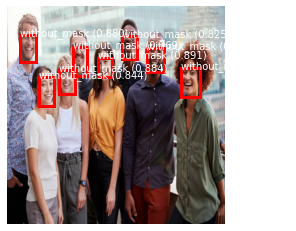

In [120]:
img=Image.open('test_2.jpg')
# img=Image.open('ankur latest passport .jpg')
img=img.resize((targetsize,targetsize))
img=np.array(img)/255
test=img
img,out=show(test,numofgrids,val=False)
out=nms(out,0.3)
print(out)
# plt.imshow(displayimage(out,img))
draw_boxes(out,img)

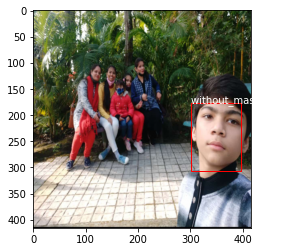

In [ ]:
draw_boxes(out,img)

In [ ]:
import PIL
import matplotlib.pyplot as plt
plt.figure()
img,out=show([],numofgrids,val=True)
out=nms(out,iou_threshold=0.4)

# plt.imshow(displayimage(out,img))
draw_boxes(out,img)

In [ ]:
out

[{'class': 'mask', 'h': 124, 'prob': 0.93672496, 'w': 68, 'x': 136, 'y': 121},
 {'class': 'mask', 'h': 116, 'prob': 0.68751556, 'w': 63, 'x': 35, 'y': 152},
 {'class': 'mask', 'h': 153, 'prob': 0.95911425, 'w': 86, 'x': 204, 'y': 145},
 {'class': 'mask', 'h': 150, 'prob': 0.9432062, 'w': 83, 'x': 306, 'y': 157},
 {'class': 'mask', 'h': 133, 'prob': 0.9386845, 'w': 72, 'x': 381, 'y': 150},
 {'class': 'mask', 'h': 146, 'prob': 0.95790416, 'w': 89, 'x': 306, 'y': 162}]

To see results on val data

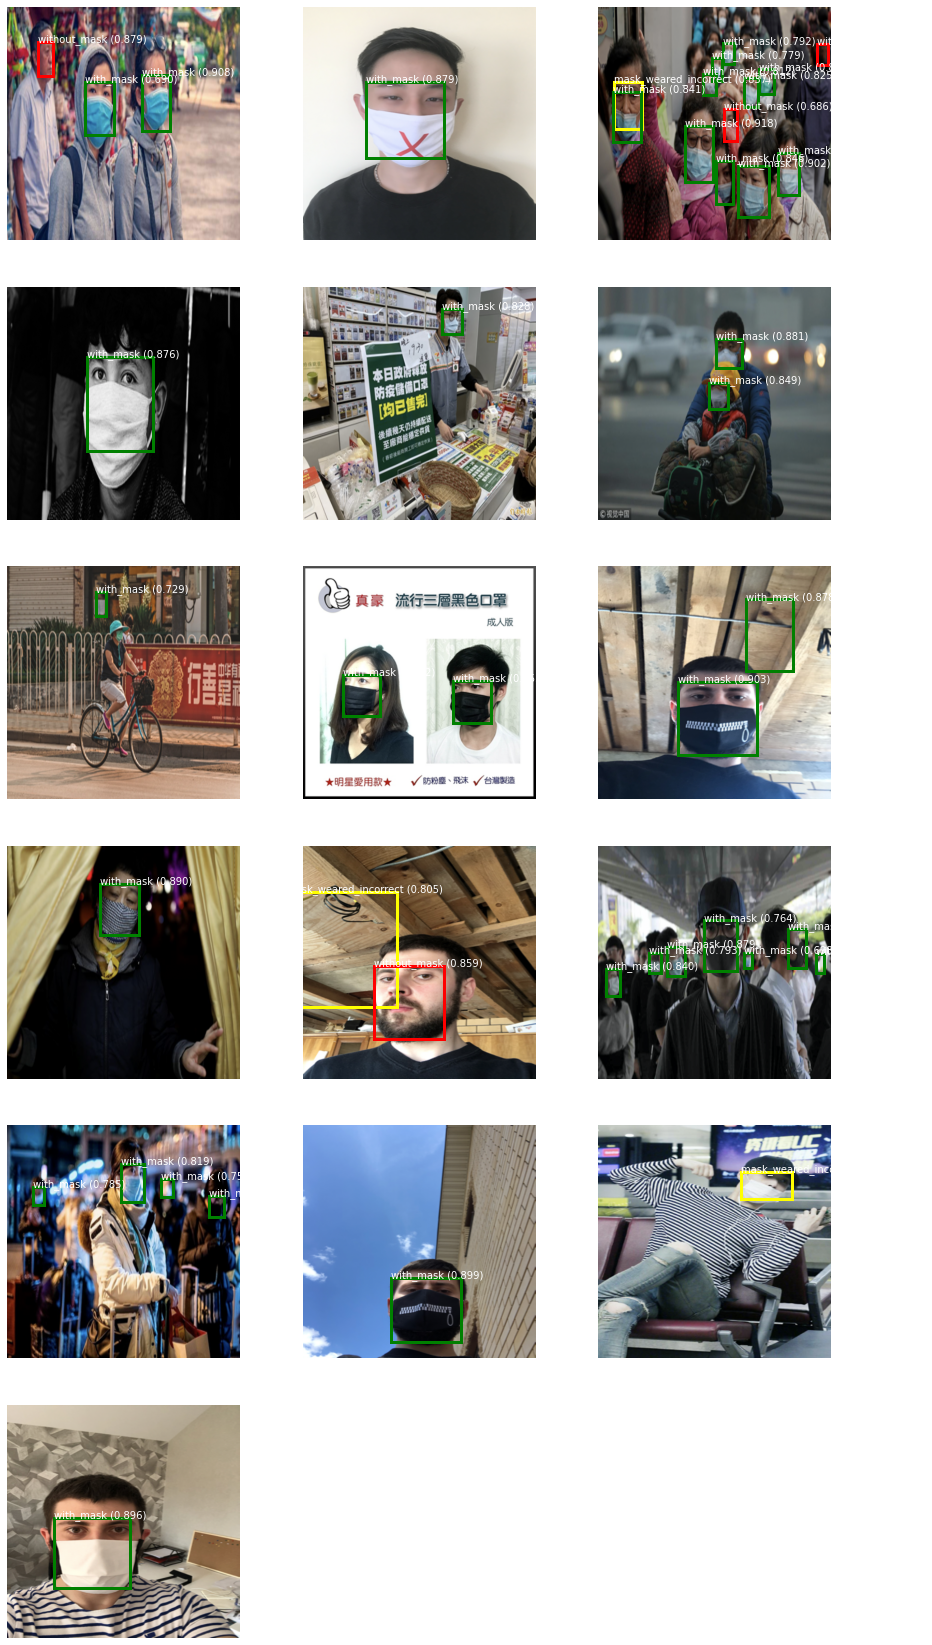

In [115]:
import PIL
import matplotlib.pyplot as plt
x_train,_=traingen.__getitem__(2)
fig=plt.figure(figsize=(15,30)) #width,height
for i in range(x_train.shape[0]):

  img=x_train[i,:,:,:]
  
  img,out=show(img,numofgrids,val=False)
  out=nms(out,iou_threshold=0.3)

  # plt.imshow(displayimage(out,img))
  fig.add_subplot(6,3,i+1)
  draw_boxes(out,img)
plt.savefig('train.jpg',dpi=200)
plt.show()

In [ ]:
# color_list=(np.random.rand(2,3)*255)
# color_list.astype('int16')
# color_list.shape

(2, 3)

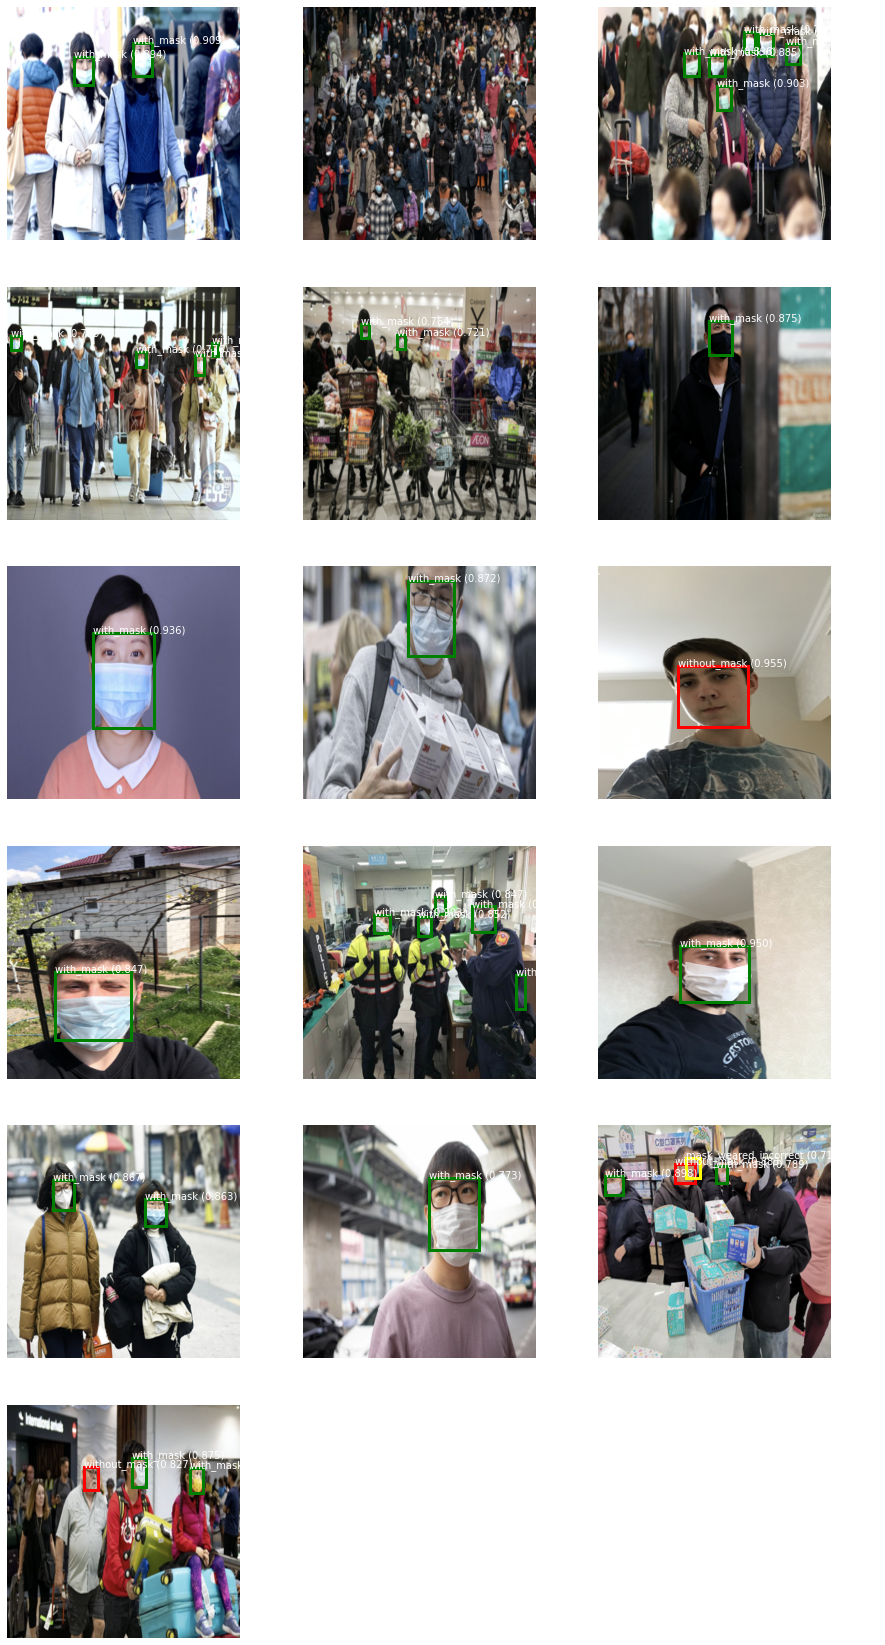

In [116]:
import PIL
import matplotlib.pyplot as plt
x_val,_=valgen.__getitem__(5)
fig=plt.figure(figsize=(15,30)) #width,height
for i in range(x_val.shape[0]):

  img=x_val[i,:,:,:]
  
  img,out=show(img,numofgrids,val=False)
  out=nms(out,iou_threshold=0.3)

  # plt.imshow(displayimage(out,img))
  fig.add_subplot(6,3,i+1)
  draw_boxes(out,img)
plt.savefig('val.jpg',dpi=200)
plt.show()

#To run on WebCam Images

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  imgweb = cv2.imdecode(jpg_as_np, flags=1)

  return imgweb

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from IPython.display import Javascript
import IPython
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  IPython.display.display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


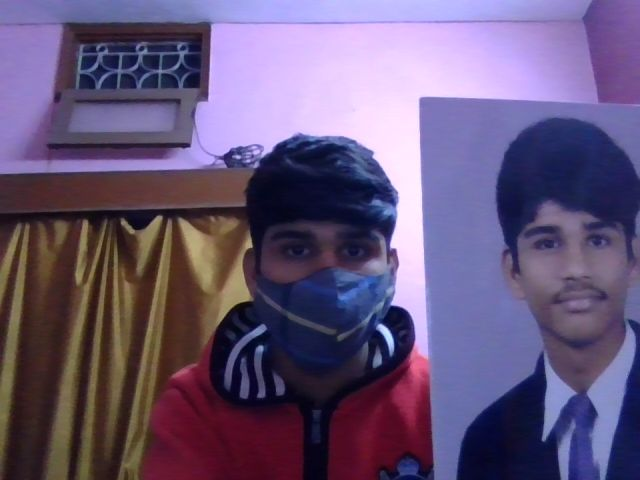

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  IPython.display.display(IPython.display.Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 224
final x,y: 216 , 251
width 89.37327575683594
height 140.35023498535156
[0.00992286 0.09496652 0.99020094]
class  2
object
x 352 y 224
final x,y: 372 , 248
width 77.40308380126953
height 146.2095489501953
[0.79973376 0.06589976 0.25039783]
class  0
object
x 192 y 256
final x,y: 211 , 260
width 95.82949829101562
height 160.0097198486328
[0.00872311 0.08580824 0.9897049 ]
class  2
[{'prob': 0.9039733, 'x': 216, 'y': 251, 'w': 89, 

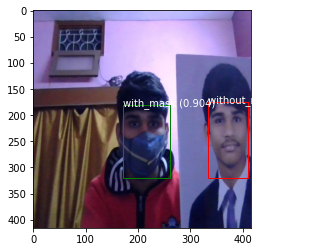

In [ ]:
from PIL import Image
img=Image.open('photo.jpg')
img=img.resize((targetsize,targetsize))
img=np.array(img)/255
test=img
img,out=show(test,numofgrids,val=False)
out=nms(out)
print(out)

# plt.imshow(displayimage(out,img))
draw_boxes(out,img)

In [ ]:
# from PIL import Image
# img1=Image.open('photo.jpg')
# img1=img1.resize((targetsize,targetsize))
# img1=np.array(img1)
# test=img1
# plt.figure()
# test,out=show(test,numofgrids,val=False)
# finalout=nms(out,iou_threshold=0.5)
# # print(img1.shape)
# print(finalout)
 
# test=displayimage(finalout,test)

# plt.imshow(img1)

# export images


[{'prob': 0.81601316, 'x': 227, 'y': 125, 'w': 29, 'h': 42, 'class': 'with_mask'}, {'prob': 0.8336654, 'x': 314, 'y': 99, 'w': 30, 'h': 44, 'class': 'with_mask'}, {'prob': 0.8642741, 'x': 168, 'y': 143, 'w': 29, 'h': 41, 'class': 'with_mask'}, {'prob': 0.90891623, 'x': 284, 'y': 155, 'w': 29, 'h': 39, 'class': 'with_mask'}, {'prob': 0.7876576, 'x': 68, 'y': 186, 'w': 27, 'h': 38, 'class': 'with_mask'}, {'prob': 0.8715714, 'x': 107, 'y': 176, 'w': 28, 'h': 36, 'class': 'with_mask'}]
[{'prob': 0.81601316, 'x': 333.95192307692304, 'y': 122.59615384615385, 'w': 42.66346153846154, 'h': 41.19230769230769, 'class': 'with_mask'}, {'prob': 0.8336654, 'x': 461.9423076923077, 'y': 97.09615384615385, 'w': 44.13461538461538, 'h': 43.15384615384615, 'class': 'with_mask'}, {'prob': 0.8642741, 'x': 247.15384615384613, 'y': 140.25, 'w': 42.66346153846154, 'h': 40.21153846153847, 'class': 'with_mask'}, {'prob': 0.90891623, 'x': 417.80769230769226, 'y': 152.01923076923077, 'w': 42.66346153846154, 'h': 38

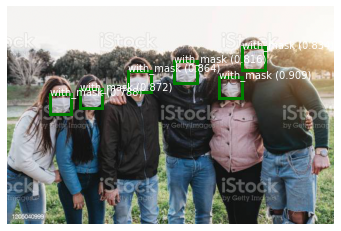

In [130]:
file='test_3.jpg'
img=Image.open(file)
xscale=targetsize/img.width
yscale=targetsize/img.height
img=img.resize((targetsize,targetsize))
img=np.array(img)/255

test=img
img,out=show(test,numofgrids,val=False)
out=nms(out,0.3)
print(out)
for i in range(len(out)):
  out[i]['x']/=xscale
  out[i]['y']/=yscale
  out[i]['w']/=xscale
  out[i]['h']/=yscale
print(out)
img=Image.open(file)
img=np.array(img)/255
draw_boxes(out,img)
plt.savefig('out.jpg',dpi=200)

#Evaluation

dict_keys(['loss', 'Category_acc', 'Iou_score', 'val_loss', 'val_Category_acc', 'val_Iou_score'])


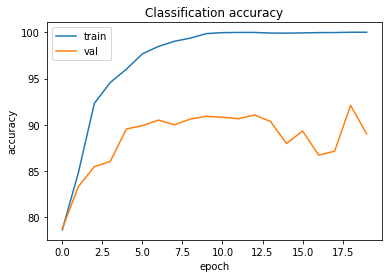

In [145]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['Category_acc'])
plt.plot(history.history['val_Category_acc'])
plt.title('Classification accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy.jpg',dpi=200)
plt.show()

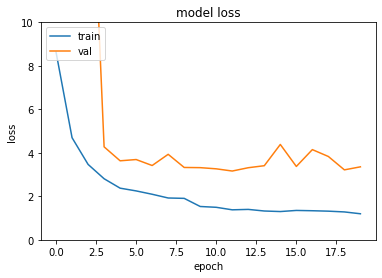

In [144]:
# summarize history for loss
plt.ylim(0,10)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss.jpg',dpi=200)
plt.show()

# THE END 
extra work from here


no.48
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
predict
[[4.15838528e-08 2.64464319e-07 5.79785478e-07 3.02404874e-06
  1.21931066e-06 7.32832905e-10 7.05542007e-08 1.70687446e-08
  1.75915841e-06]
 [6.52408829e-08 1.12790119e-07 1.07645705e-04 2.53362505e-05
  9.18423575e-06 2.34225172e-06 2.85036367e-05 5.25046198e-06
  6.49938485e-08]
 [1.68455790e-05 9.49129026e-06 1.59857720e-02 3.40656625e-05
  1.72528427e-03 3.42382380e-04 4.94762171e-05 4.86319323e-06
  1.42467336e-08]
 [5.24294376e-03 1.54588732e-03 5.48400351e-07 2.92659261e-05
  1.97860021e-02 1.88736095e-07 1.60820535e-04 2.03261479e-07
  1.62670333e-02]
 [7.93528397e-06 9.59587807e-04 9.99377549e-01 9.23536427e-04
  4.91960160e-02 6.41520368e-04 9.99936461e-01 2.67957337e-03
  4.64836950e-04]
 [6.4

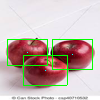

In [ ]:
c=int(input('no.'))
img=x_train[c,:,:,:]
test=img
Image.fromarray(test)

print(y_train[c,:,:,0])
print('predict')
  
test=test.reshape([1,test.shape[0],test.shape[1],test.shape[2]])
test.shape
pred=model.predict(test)
pred[0,:,:,0:3]=sigmoid(pred[0,:,:,0:3])
print(pred[0,:,:,0])
print(((pred[0,:,:,0]>0.7)*1).reshape([numofgrids,numofgrids]))

pred[...,0]=(pred[0,:,:,0]>0.7)*1
#pred[...,1:3]=sigmoid(pred[...,1:3])
pred[...,5:]=K.softmax(pred[...,5:])
test=img
for i in range(numofgrids):
  for j in range(numofgrids):
    if(pred[0,i,j,0]==1):
      print("object")
      x=j*int(targetsize/numofgrids)
      y=i*int(targetsize/numofgrids)
      print('x',x,'y',y)
      xincell=pred[0,i,j,1]*int(targetsize/numofgrids)
      yincell=pred[0,i,j,2]*int(targetsize/numofgrids)
      print('final x,y:',int(x+xincell),",",int(y+yincell))
      uppercornerx=int(x+xincell)-int(pred[0,i,j,3]*int(targetsize/numofgrids)/2)
      uppercornery=int(y+yincell)-int(pred[0,i,j,4]*int(targetsize/numofgrids)/2)
     
      lowercornerx=int(x+xincell)+int(pred[0,i,j,3]*int(targetsize/numofgrids)/2)
      lowercornery=int(y+yincell)+int(pred[0,i,j,4]*int(targetsize/numofgrids)/2)

      print('width',pred[0,i,j,3]*int(targetsize/numofgrids))
      print('height',pred[0,i,j,4]*int(targetsize/numofgrids))
      print(pred[0,i,j,5:])
      print("class ",np.argmax(pred[0,i,j,5:]))
      if (np.argmax(pred[0,i,j,5:])==1):
        rgb=[255,0,0]
      else:
        rgb=[0,255,0]
      test[K.clip(uppercornery,min_value=0,max_value=targetsize-1):K.clip(uppercornery+int(pred[0,i,j,4]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1),:]=rgb
      test[K.clip(lowercornery-int(pred[0,i,j,4]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1):K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(lowercornerx,min_value=0,max_value=targetsize-1),:]=rgb

      test[K.clip(uppercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+int(pred[0,i,j,3]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),:]=rgb
      test[K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+int(pred[0,i,j,3]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),:]=rgb

      

      test[K.clip(int(y+yincell),min_value=0,max_value=targetsize-1),K.clip(int(x+xincell),min_value=0,max_value=targetsize-1),:]=[0,255,255] #center
        # test[uppercornery,uppercornerx,:]=[0,0,255]
        # test[lowercornery,lowercornerx,:]=[0,0,255]
Image.fromarray(test)

In [ ]:
pred[...,3:5]

In [ ]:
# pred[0,:,:,:]

In [ ]:
x_input=layers.Input(shape=(100,100,3))
x=layers.Conv2D(32,(3,3),activation='relu')(x_input)
x=layers.MaxPooling2D((2,2))(x)
#x=layers.Dropout(0.8)(x)

x=layers.Conv2D(64,(3,3),activation='relu')(x)
x=layers.MaxPooling2D((2,2))(x)
#x=layers.Dropout(0.8)(x)

x=layers.Conv2D(64,(3,3),activation='relu')(x)
x=layers.MaxPooling2D((2,2))(x)

x=layers.Flatten()(x)
x=layers.Dropout(0.8)(x)
x=layers.Dense(25*3,activation='linear')(x)
output=layers.Reshape((5,5,3))(x)

modelpc=Model(inputs=x_input,outputs=output)
modelpc.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 64)        0   

In [ ]:
def pc_loss2(y_true,y_pred):
  obj=y_true[...,0]==1            #index of cells which have objects
  noobj=y_true[...,0]==0
  print("true",y_true.shape,'pred',y_pred.shape)
  obj_loss=K.binary_crossentropy(y_true[...,0][obj], y_pred[...,0][obj],from_logits=True)

  noobj_loss=K.binary_crossentropy(y_true[...,0][noobj], y_pred[...,0][noobj],from_logits=True)
  class_loss=K.categorical_crossentropy(y_true[...,1:][obj],y_pred[...,1:][obj],from_logits=True)
  #class_loss=K.mean(K.square(y_true[...,1:][obj] - y_pred[...,1:][obj]), axis=-1)
  #class_loss=K.binary_crossentropy(y_true[...,1:], y_pred[...,1:],from_logits=True)
  noobjval=1
  objval=1
  classval=0
  #return ((classval*class_loss)+(objval*obj_loss))
  obj_loss_single=tf.reduce_mean(obj_loss)
  noobj_loss_single=tf.reduce_mean(noobj_loss)
  class_loss_single=tf.reduce_mean(class_loss)
  tf.print('objloss',obj_loss_single)
  tf.print('noobjloss',noobj_loss_single)
  return ((objval*obj_loss_single)+(noobjval*noobj_loss_single)+(classval*class_loss_single))

In [ ]:
def loss_function(y_true, y_pred):
  obj=y_true==1            #index of cells which have objects
  noobj=y_true==0          #index of cells which does not have objects
  #print(y_true)
  # objarr=(obj)*1
  # noobjarr=np.array(noobj)*1
  # obj_mask=K.variable(objarr)
  # noobj_mask=K.variable(noobjarr)
  obj_mask=tf.cast(obj,dtype='float32')
  noobj_mask=tf.cast(noobj,dtype='float32')
  #print(obj_mask)
  #print(noobj_mask)
  #print("obj",obj,'noobj',noobj)
  #bj_loss=K.binary_crossentropy(y_true[obj], y_pred[obj],from_logits=True)
  obj_loss=K.binary_crossentropy(y_true*obj_mask, y_pred*obj_mask,from_logits=True)

  #noobj_loss=K.binary_crossentropy(y_true[noobj], y_pred[noobj],from_logits=True)
  noobj_loss=K.binary_crossentropy(y_true*noobj_mask, y_pred*noobj_mask,from_logits=True)
  #print(y_true[noobj])
  return obj_loss

In [ ]:
from keras import backend as K
def anne(y_true,y_pred):
  return K.binary_crossentropy(y_true[...,0], y_pred[...,0],from_logits=True)

In [ ]:
y_train[0:2,:,:,0,None].shape

(2, 5, 5, 1)

In [ ]:
loss_function(K.variable(y_train[0:2,:,:,0].reshape([-1,25])),K.variable(y_train[2:4,:,:,0].reshape([-1,25])))

<tf.Tensor: shape=(2, 25), dtype=float32, numpy=
array([[0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472],
       [0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.3132617, 0.3132617, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.3132617, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472]], dtype=float32)>

In [ ]:
np.concatenate([y_train[0:2,:,:,0:1],y_train[0:2,:,:,5:]],axis=-1).shape
np.concatenate([y_train[2:4,:,:,0:1],y_train[2:4,:,:,5:]],axis=-1).shape

(2, 5, 5, 3)

In [ ]:
pc_loss2(K.variable(np.concatenate([y_train[0:2,:,:,0:1],y_train[0:2,:,:,5:]],axis=-1)),K.variable(np.concatenate([y_train[2:4,:,:,0:1],y_train[2:4,:,:,5:]],axis=-1)))

true (2, 5, 5, 3) pred (2, 5, 5, 3)
objloss 0.566518724
noobjloss 0.768770933


<tf.Tensor: shape=(), dtype=float32, numpy=1.3352897>

In [ ]:
#modelpc.compile(loss=anne,optimizer='adam')
modelpc.compile(loss=pc_loss2,optimizer='adam')

In [ ]:
#y_train[:,:,:,0].reshape([-1,25]).shape
np.concatenate([y_train[:,:,:,0:1],y_train[:,:,:,5:]],axis=-1).shape

(563, 5, 5, 3)

In [ ]:
modelpc.fit(x=x_train,y=np.concatenate([y_train[:,:,:,0:1],y_train[:,:,:,5:]],axis=-1),validation_data=(x_val,np.concatenate([y_val[:,:,:,0:1],y_val[:,:,:,5:]],axis=-1)),batch_size=64,epochs=100)

Epoch 1/100
true (None, 5, 5, 3) pred (None, 5, 5, 3)
true (None, 5, 5, 3) pred (None, 5, 5, 3)
objloss 36.1534081
noobjloss 36.9693718
1/9 [==>...........................] - ETA: 18s - loss: 73.1228objloss 22.8330498
noobjloss 14.1670542
2/9 [=====>........................] - ETA: 6s - loss: 64.0921 objloss 13.4083643
noobjloss 6.66248226
3/9 [=========>....................] - ETA: 5s - loss: 57.1940objloss 7.78561592
noobjloss 4.10832167
4/9 [============>.................] - ETA: 4s - loss: 51.7760objloss 4.01395416
noobjloss 2.23786688
5/9 [===============>..............] - ETA: 3s - loss: 47.3544objloss 2.17022943
noobjloss 1.51055944
6/9 [===================>..........] - ETA: 2s - loss: 43.6848objloss 1.62572122
noobjloss 1.09376025
7/9 [======================>.......] - ETA: 1s - loss: 40.6020objloss 1.14223564
noobjloss 0.855054319
8/9 [=========================>....] - ETA: 0s - loss: 37.9758objloss 0.866704047
noobjloss 0.726500392
9/9 [==============================] - ETA:

KeyboardInterrupt: ignored

no.9


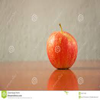

In [ ]:
c=int(input('no.'))
test=x_val[c,:,:,:]
Image.fromarray(test)

In [ ]:
print(y_val[c,:,:,0])
print('predicted')
test=test.reshape([1,test.shape[0],test.shape[1],test.shape[2]])
test.shape
pred=modelpc.predict(test)
print(pred.shape)
pred=sigmoid(pred)

print(np.round(pred[0,:,:,0].reshape([5,5]),decimals=5))
print(((pred[0,:,:,0]>0.5)*1).reshape([5,5]))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
predicted
(1, 5, 5, 3)
[[0.46191 0.46806 0.46487 0.47348 0.46302]
 [0.47444 0.51825 0.53377 0.52357 0.48414]
 [0.49717 0.53562 0.54107 0.53766 0.49957]
 [0.47683 0.53072 0.53331 0.53038 0.48025]
 [0.46393 0.4716  0.46802 0.47084 0.46249]]
[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


In [ ]:
mask=(pred[0,:,:,0]>0.5)
pred[0,:,:,0]=(pred[0,:,:,0]>0.5)*1
(pred[0,:,:,:]>0.5)*1

In [ ]:
np.concatenate([y_val[c,:,:,0:1],y_val[c,:,:,5:]],axis=-1)